In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Source: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
print("hello 1")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


transform = transforms.Compose(
    [transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                            shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

hello 1
Files already downloaded and verified
Files already downloaded and verified


Data Point 1 - Label: 8


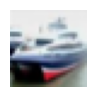

In [2]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
# Function to display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

subset_indices = [1]
subset = torch.utils.data.Subset(testset, subset_indices)

testloader = torch.utils.data.DataLoader(subset, batch_size=1, shuffle=False, num_workers=1)
labels_mapping = [ "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

for i, data in enumerate(testloader, 0):
    inputs, labels = data
    print(f"Data Point {i + 1} - Label: {labels.item()}")
    plt.figure(figsize=(1,1))
    plt.axis('off')
    imshow(torchvision.utils.make_grid(inputs))

    #plt.imshow(inputs)
    #plt.imshow(make_grid(inputs, nrow=1).permute((1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Data Point 1 - Label: 5
Data Point 2 - Label: 2
Data Point 3 - Label: 2


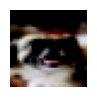

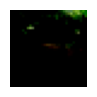

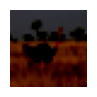

In [8]:
help_indices = [4882, 5127, 41865]
help_subset = torch.utils.data.Subset(trainset, help_indices)

train_loader = torch.utils.data.DataLoader(help_subset, batch_size=1, shuffle=False, num_workers=1)
for i, data in enumerate(train_loader, 0):
    inputs, labels = data
    print(f"Data Point {i + 1} - Label: {labels.item()}")
    plt.figure(figsize=(1,1))
    plt.axis('off')
    #plt.imshow(inputs)
    plt.imshow(make_grid(inputs, nrow=1).permute((1, 2, 0)))

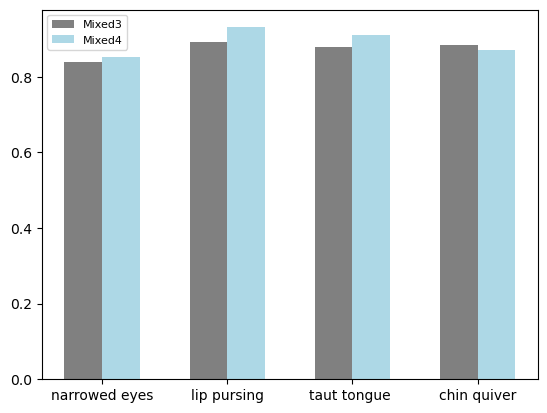

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# Sample data
methods = ['narrowed eyes', 'lip pursing', 'taut tongue ', 'chin quiver' ] # 
correlation_values = np.array([[0.8383, 0.8516],  # Replace with your actual Spearman correlation coefficients
                               [0.8928, 0.9309], [0.8796, 0.9112], [0.8838, 0.8695] ]) # Replace with your actual Pearson correlation coefficients
# nasolabial furrow, brow lowering, narrowed eyes, vertical and horizontal mouth stretch, lip pursing, lip opening, tongue protrusion, taut tongue, and chin quiver.

bar_width = 0.3
index = np.arange(len(methods))

fig, ax = plt.subplots()
for i, method in enumerate(['Mixed3', 'Mixed4']):
    colors = ['grey', 'lightblue']
    ax.bar(index + i * bar_width, correlation_values[:, i], bar_width, label=f'{method}', color=colors[i])

# Adding labels and title
#ax.set_xlabel('Methods')
#ax.set_ylabel('Correlation Coefficient')
#ax.set_title('Spearman and Pearson Correlation ', fontsize=9)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods)
#ax.legend()
ax.legend(fontsize=8, loc='upper left', bbox_to_anchor=(0, 1))
plt.show()

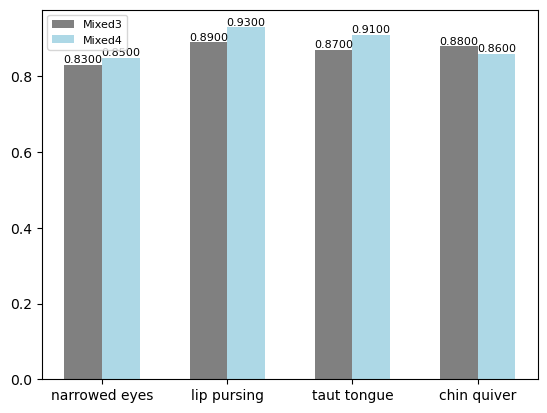

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
methods = ['narrowed eyes', 'lip pursing', 'taut tongue', 'chin quiver']
correlation_values = np.array([[0.83, 0.85],
                               [0.89, 0.93], [0.87, 0.91], [0.88, 0.86]])

bar_width = 0.3
index = np.arange(len(methods))

fig, ax = plt.subplots()

for i, method in enumerate(['Mixed3', 'Mixed4']):
    colors = ['grey', 'lightblue']
    bars = ax.bar(index + i * bar_width, correlation_values[:, i], bar_width, label=f'{method}', color=colors[i])

    # Adding values on top of each bar
    for bar, value in zip(bars, correlation_values[:, i]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.4f}', ha='center', va='bottom', fontsize=8)

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods)
ax.legend(fontsize=8, loc='upper left', bbox_to_anchor=(0, 1))

plt.show()


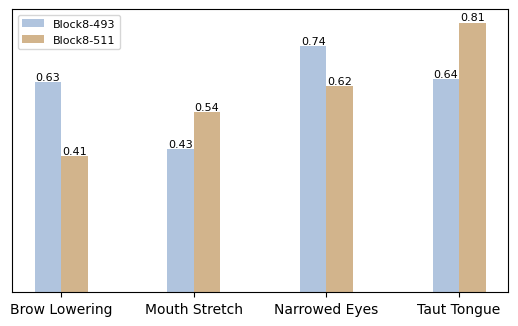

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
methods = ['Brow Lowering', 'Mouth Stretch', 'Narrowed Eyes', 'Taut Tongue']
correlation_values = np.array([[0.63, 0.41],
                               [0.43, 0.54], [0.74, 0.62], [0.64, 0.81]])

bar_width = 0.2
index = np.arange(len(methods))

fig, ax = plt.subplots()

for i, method in enumerate(['Block8-493', 'Block8-511']):
    colors = ['lightsteelblue', 'tan']
    bars = ax.bar(index + i * bar_width, correlation_values[:, i], bar_width, label=f'{method}', color=colors[i])

    # Adding values on top of each bar
    for bar, value in zip(bars, correlation_values[:, i]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{value:.2f}', ha='center', va='bottom', fontsize=8)

ax.get_yaxis().set_visible(False)

#ax.set_title('Spearman and Pearson Correlation', fontsize=9, pad=20)  # Adjust the pad value as needed
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(methods)
ax.legend(fontsize=8, loc='upper left', bbox_to_anchor=(0, 1))

# Increase space between bar heights and title line
plt.subplots_adjust(top=0.7)  # Adjust the top value as needed

plt.show()


In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

def show_images(datset, num_samples=20, cols=4):
    """ Plots some samples from the dataset """
    plt.figure(figsize=(15,15)) 
    for i, img in enumerate(data):
        if i == num_samples:
            break
        plt.subplot(int(num_samples/cols) + 1, cols, i + 1)
        plt.imshow(img[0])

data = torchvision.datasets.StanfordCars(root=".", download=True)
show_images(data)

HTTPError: HTTP Error 404: Not Found